In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

In [ ]:
#Your first requirement is to create a series of scatter plots to 
#showcase the following relationships:
#Temperature (F) vs. Latitude
#Humidity (%) vs. Latitude
#Cloudiness (%) vs. Latitude
#Wind Speed (mph) vs. Latitude

In [13]:
#1) I need to first draw from the url api to create dictionaries for each variable

url = "http://api.openweathermap.org/data/2.5/weather?"

temp = []
lats = []
lngs = []
humidity = []
cloudiness = []
wind_speed = []
city_name = []
date = []
country = []


In [15]:
#2) Create for statement to query city weather from api

for city in cities:
    time.sleep(1.01)
    try:
        query_city = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
        response = requests.get(query_city)
        response = response.json()
        temp.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        

    except KeyError: 
        print("city not found")
        

        
#print(query_city)

city not found
city not found


In [23]:
#3) Create dataframe of using my created dictionaries

weather_df = pd.DataFrame({"City": city_name,
                           "Temperature (F)": temp,
                           "Humidity (%)": humidity,
                           "Cloudiness(%)": cloudiness,
                           "Wind Speed (mph)": wind_speed,
                           "Latitude": lats,
                           "Longitude": lngs
                           
                          })
output = weather_df.to_csv("WeatherPy.csv")

weather_df

,City,Temperature (F),Humidity (%),Cloudiness(%),Wind Speed (mph),Latitude,Longitude
0,Vuktyl,26.10,97,99,8.03,63.86,57.31
1,Clyde River,12.20,85,20,19.46,70.47,-68.59
2,Valday,43.30,87,100,10.00,57.97,33.25
3,East London,67.57,84,78,15.86,-33.02,27.91
4,Vuktyl,26.10,97,99,8.03,63.86,57.31
5,Clyde River,12.20,85,20,19.46,70.47,-68.59
6,Valday,43.30,87,100,10.00,57.97,33.25
7,East London,67.57,84,78,15.86,-33.02,27.91
8,Puerto Ayora,73.94,65,40,17.22,-0.74,-90.35
9,Isangel,78.80,83,90,5.82,-19.55,169.27


<AxesSubplot:xlabel='Latitude', ylabel='Temperature (F)'>

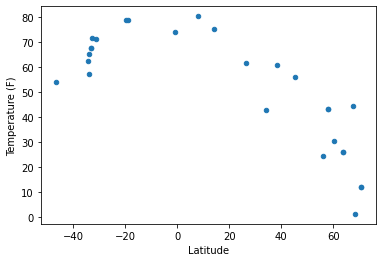

In [20]:
weather_df.plot(kind="scatter", x="Latitude", y="Temperature (F)")

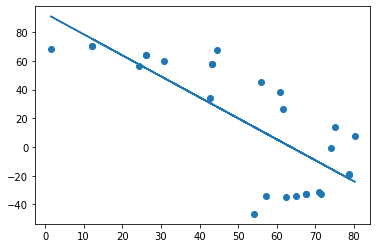

In [22]:
(slope,intercept,rvalue,pvalue,stderr) = linregress(weather_df["Temperature (F)"], weather_df["Latitude"])
x = weather_df["Temperature (F)"]
regressvalues = slope*x+intercept
plt.plot(x,regressvalues)
plt.scatter(x,weather_df["Latitude"])
plt.show()